In [1]:

## Volatilidad: Modelos GARCH
## Series Temporales
## Volatilidad IBM


In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/Librerias', nb_path)
#sys.path.insert(0, nb_path)  # or append(nb_path)
sys.path.append(nb_path)  # or append(nb_path)

Mounted at /content/mnt


In [3]:
import warnings
warnings.filterwarnings('ignore')

 # Introducción

In [4]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read Data
df = pd.read_csv('/content/mnt/My Drive/Colab Notebooks/Series Temporales/S06/IBM.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
5467,2021-09-24,138.479996,136.750000,137.029999,137.490005,2964400.0,137.490005
5468,2021-09-27,139.070007,137.479996,137.960007,138.559998,3306900.0,138.559998
5469,2021-09-28,139.690002,137.210007,139.169998,137.470001,4314600.0,137.470001
5470,2021-09-29,139.929993,136.440002,137.729996,139.179993,3773900.0,139.179993
5471,2021-09-30,140.570007,138.500000,140.000000,138.929993,5822400.0,138.929993


In [6]:
# Select Close adjusted
data=df[['Date', 'Adj Close']].rename(columns={'Adj Close': 'Price'})
data['Date']=pd.to_datetime(data['Date'])
data=data.set_index('Date')
data.tail()

,Price
Date,
2021-09-24,137.490005
2021-09-27,138.559998
2021-09-28,137.470001
2021-09-29,139.179993
2021-09-30,138.929993


In [7]:
# Seaborn plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

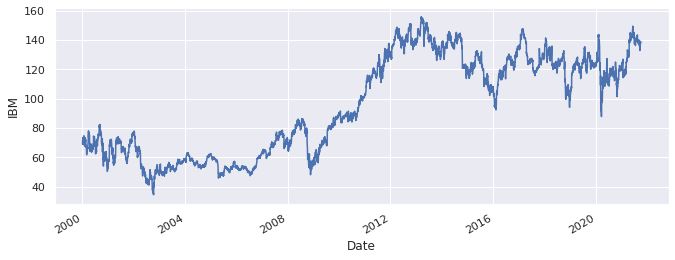

In [8]:
# Plot stock prices
ax = data.Price.plot( linestyle='-')
ax.set_ylabel('IBM');


 <div class="hr1"></div>
 # Calculate Daily Logarithmic Return and Squared
 <div class="hr1"></div>

In [9]:
# Log return
#
data['log_ret'] =np.log(data.Price).diff()
data.tail()

,Price,log_ret
Date,,
2021-09-24,137.490005,0.005543
2021-09-27,138.559998,0.007752
2021-09-28,137.470001,-0.007898
2021-09-29,139.179993,0.012362
2021-09-30,138.929993,-0.001798


In [10]:
# Squared Log return
# Proxy Volatility

data['Squared'] =data['log_ret']**2
data.tail()

,Price,log_ret,Squared
Date,,,
2021-09-24,137.490005,0.005543,0.000031
2021-09-27,138.559998,0.007752,0.000060
2021-09-28,137.470001,-0.007898,0.000062
2021-09-29,139.179993,0.012362,0.000153
2021-09-30,138.929993,-0.001798,0.000003



 <div class="hr1"></div>
 #Plot return squared
 <div class="hr1"></div>

Text(0.5, 0.8, 'Volatilidad')

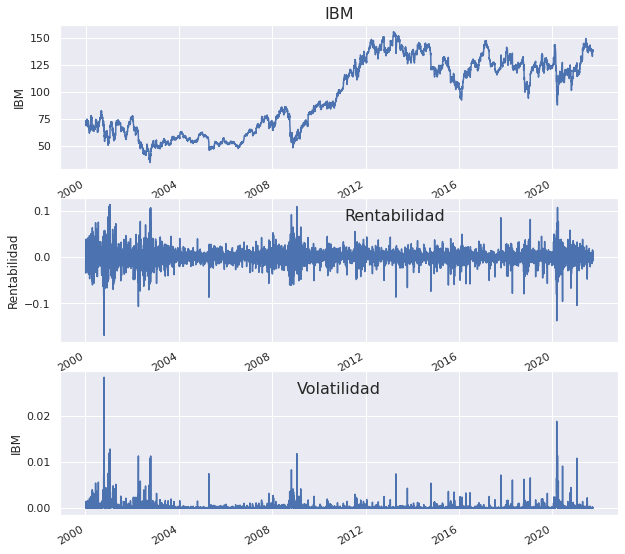

In [11]:
#
#
fig = plt.figure(figsize=(10,10))
plt.subplot(311)
ax=data.Price.plot( linestyle='-')
ax.set_ylabel('IBM')
ax.set_xlabel('')
ax.set_title('IBM', y=1, fontsize = 16)
plt.subplot(312)
ax=data.log_ret.plot( linestyle='-')
ax.set_ylabel('Rentabilidad')
ax.set_xlabel('')
ax.set_title('Rentabilidad', y=0.8, x=0.6,fontsize = 16)
plt.subplot(313)
ax=data.Squared.plot( linestyle='-')
ax.set_ylabel('IBM')
ax.set_xlabel('')
ax.set_title('Volatilidad', y=0.8, fontsize = 16)


 <div class="hr1"></div>
 ## Testing mean
 <div class="hr1"></div>

In [12]:
# mean zero test
from scipy import stats
alpha=0.05
t, p =stats.ttest_1samp(data['log_ret'].dropna(),0.0)
print ('Estadítico t:',t)
print ('p-value:',p)

if  p < alpha:
    print (f'Con {alpha} de significación: Rechazamos la hipotesis de media cero.')
else:
    print (f'Con {alpha} de significación: No podemos rechazar la hipotesis de media cero.')

Estadítico t: 0.542759772252212
p-value: 0.5873173271424005
Con 0.05 de significación: No podemos rechazar la hipotesis de media cero.



 <div class="hr1"></div>
 ## ACF y PACF
 ## Ljung-Box Test
 <div class="hr1"></div>

In [13]:
# Autocorrelation Fuction Original Time Series
from sktime.utils.plotting import plot_correlations

In [14]:
# Create proxy Volatility 
ibm_vol=data['Squared'].astype('float64').to_period('D').sort_index().dropna()
ibm_vol.tail()

Date
2021-09-24    0.000031
2021-09-27    0.000060
2021-09-28    0.000062
2021-09-29    0.000153
2021-09-30    0.000003
Freq: D, Name: Squared, dtype: float64

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f408cd0a090>,
       dtype=object))

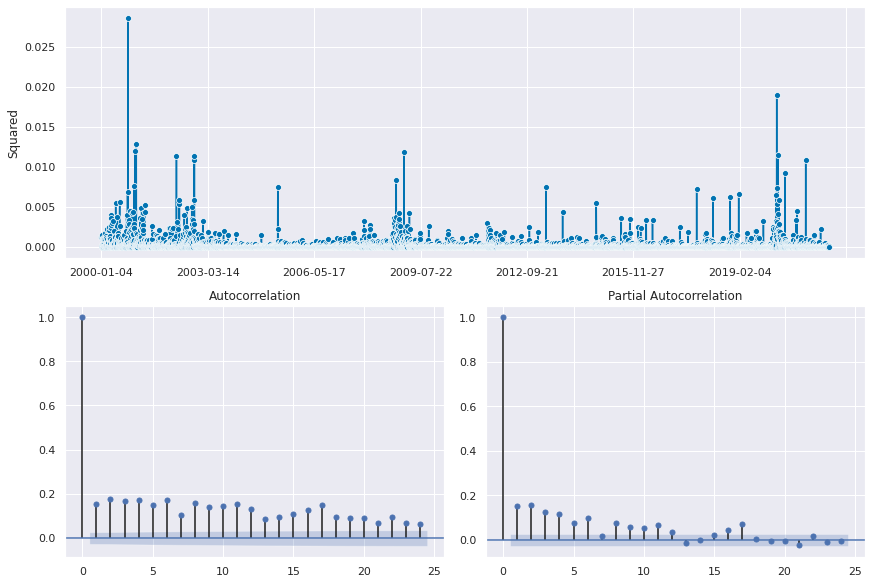

In [15]:
# Plot Autocorrelation
plot_correlations(ibm_vol)

In [16]:
# import function test Ljung_Box
import statsmodels.api as sm
test_Ljung_Box=sm.stats.acorr_ljungbox

In [17]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(ibm_vol, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,1316.257414,1.185796e-276
20,2047.259372,0.000000e+00
30,2398.015047,0.000000e+00



 <div class="hr1"></div>
 ## LM test
 <div class="hr1"></div>

In [18]:
# import function test LM-Arch
import statsmodels.api as sm
test_LM_ARCH=sm.stats.diagnostic.het_arch

In [19]:
#
# testing LM-ARCH
# pvalue < alpha -> ARCH
lm, lmpval, f, pval, result_int =test_LM_ARCH(data['log_ret'].dropna(), nlags=20, store=True)
print ('Estadístico LM: ', lm)
print ('p-value: ', lmpval)
print ('Estadístico F: ', f)
print ('p-value: ', pval)

Estadístico LM:  619.9267426561952
p-value:  1.8171989001942578e-118
Estadístico F:  34.83907232731476
p-value:  3.243874829088287e-126


In [20]:
#
result_int.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     34.84
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          3.24e-126
Time:                        16:33:26   Log-Likelihood:                 30838.
No. Observations:                5451   AIC:                        -6.163e+04
Df Residuals:                    5430   BIC:                        -6.150e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.093e-05    1.4e-05      5.760      0.000    5.34e-05       0.000
x1             0.0567      0.014      4.181      0.000       0.030       0.083
x2             0.0859      0.014      6.321      0.000       0.059       0.113
x3             0.0780      0.014      5.715      0.000       0.051       0.105
x4             0.0784      0.014      5.742      0.000       0.052       0.105
x5             0.0422      0.014      3.082      0.002       0.015       0.069
x6             0.0640      0.014      4.675      0.000       0.037       0.091
x7            -0.0105      0.014     -0.764      0.445      -0.037       0.016
x8             0.0547      0.014      3.987      0.000       0.028       0.082
x9             0.0414      0.014      3.013      0.003       0.014       0.068
x10            0.0459      0.014      3.344      0.001       0.019       0.073
x11            0.0568      0.014      4.138      0.000       0.030       0.084
x12            0.0263      0.014      1.919      0.055      -0.001       0.053
x13           -0.0235      0.014     -1.713      0.087      -0.050       0.003
x14           -0.0125      0.014     -0.911      0.363      -0.039       0.014
x15            0.0133      0.014      0.972      0.331      -0.014       0.040
x16            0.0420      0.014      3.071      0.002       0.015       0.069
x17            0.0714      0.014      5.234      0.000       0.045       0.098
x18            0.0044      0.014      0.326      0.744      -0.022       0.031
x19           -0.0035      0.014     -0.257      0.797      -0.030       0.023
x20           -0.0058      0.014     -0.426      0.670      -0.032       0.021
==============================================================================
Omnibus:                     9660.186   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17444988.075
Skew:                          12.433   Prob(JB):                         0.00
Kurtosis:                     279.025   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


 <div class="hr1"></div>
 ## ARCH(1)
 <div class="hr1"></div>

In [21]:
# https://github.com/bashtage/arch/
# pip install arch

In [22]:


from arch.univariate import ARX
from arch.univariate import ARCH, GARCH

In [23]:
# Modelo para la Media un AR(1)
ar = ARX(100*data['log_ret'].dropna(), lags=[1])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                log_ret   R-squared:                       0.003
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:          Constant Variance   Log-Likelihood:               -10534.0
Distribution:                  Normal   AIC:                           21074.1
Method:            Maximum Likelihood   BIC:                           21093.9
                                        No. Observations:                 5470
Date:                Sat, Oct 22 2022   Df Residuals:                     5468
Time:                        16:33:45   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0135  2.247e-02      0.599      0.5

In [24]:
# MODELO ERRONEO
# ARCH(1)
ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - ARCH Model Results                            
Dep. Variable:                log_ret   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:                       ARCH   Log-Likelihood:               -10169.3
Distribution:                  Normal   AIC:                           20346.5
Method:            Maximum Likelihood   BIC:                           20373.0
                                        No. Observations:                 5470
Date:                Sat, Oct 22 2022   Df Residuals:                     5468
Time:                        16:33:45   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0335  2.368e-02      1.415      0.157 

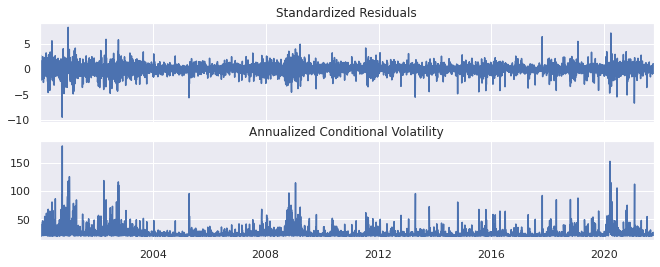

In [25]:
#
fig = res.plot(annualize="D")

In [26]:
# Análisis Residuos
mod1_std_resid=(res.resid / res.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407a6f72d0>,
       dtype=object))

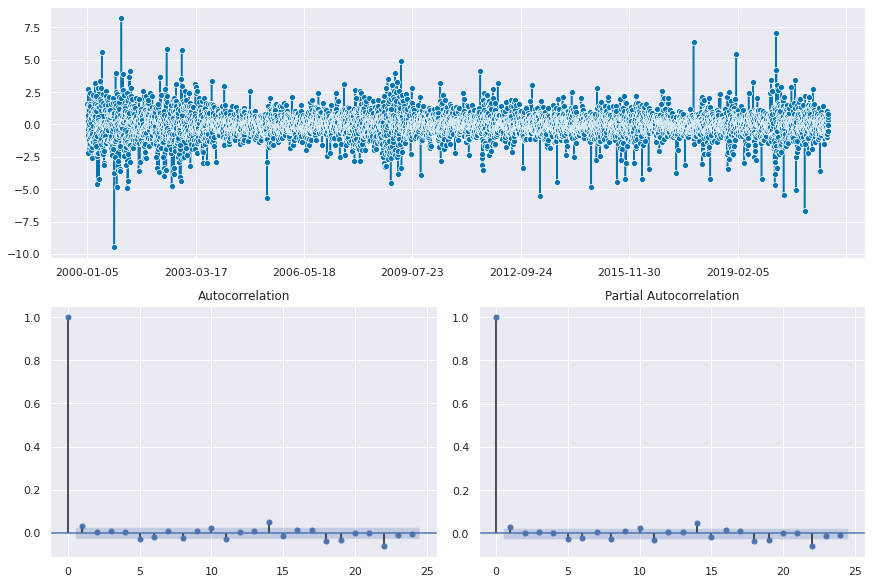

In [27]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid)

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407a629d90>,
       dtype=object))

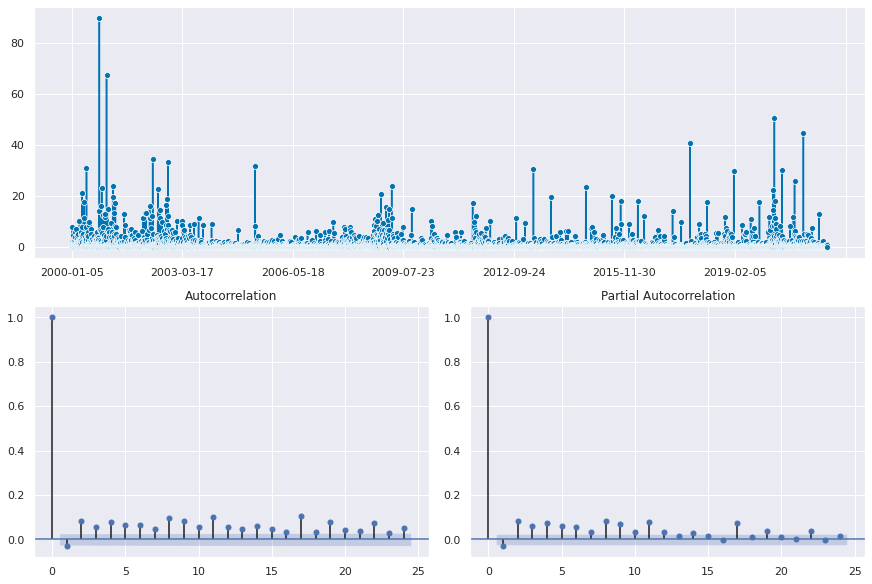

In [28]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid**2)

In [29]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid**2, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,253.263435,1.117709e-48
20,486.911753,1.595013e-90
30,604.498277,3.468119e-108


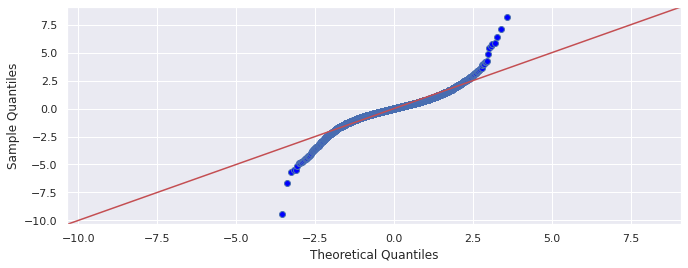

In [30]:
# qqplot
sm.qqplot(mod1_std_resid,line='45')
plt.show()

# <div class="hr1"></div>
 ## GARCH(1,1)
 <div class="hr1"></div>

In [31]:
#
ar = ARX(100*data['log_ret'].dropna(), lags=[1])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                log_ret   R-squared:                       0.003
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:          Constant Variance   Log-Likelihood:               -10534.0
Distribution:                  Normal   AIC:                           21074.1
Method:            Maximum Likelihood   BIC:                           21093.9
                                        No. Observations:                 5470
Date:                Sat, Oct 22 2022   Df Residuals:                     5468
Time:                        16:33:52   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0135  2.247e-02      0.599      0.5

In [32]:
# MODELO 
# GARCH(1,1)
ar.volatility = GARCH(p=1,q=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                log_ret   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -9673.42
Distribution:                  Normal   AIC:                           19356.8
Method:            Maximum Likelihood   BIC:                           19389.9
                                        No. Observations:                 5470
Date:                Sat, Oct 22 2022   Df Residuals:                     5468
Time:                        16:33:52   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0359  1.909e-02      1.879  6.018e-02 

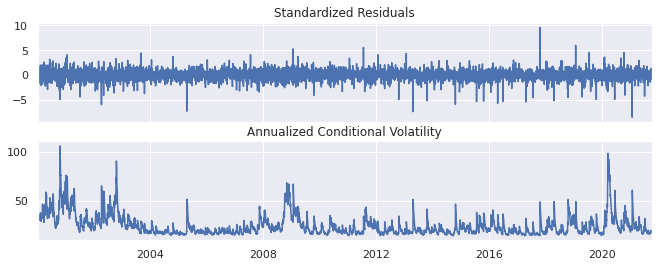

In [33]:
#
fig = res.plot(annualize="D")

In [34]:
# Análisis Residuos
mod1_std_resid=(res.resid / res.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407a6b0a10>,
       dtype=object))

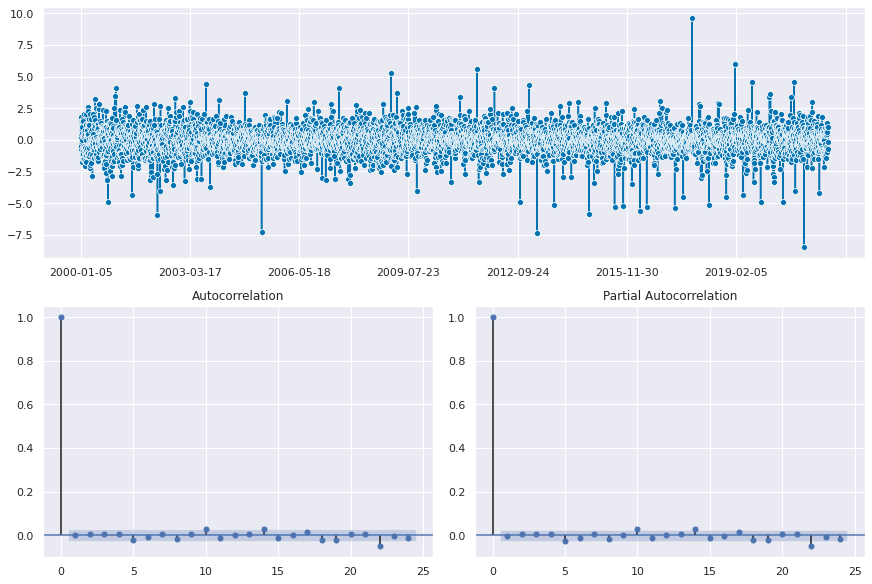

In [35]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid)

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40813af4d0>,
       dtype=object))

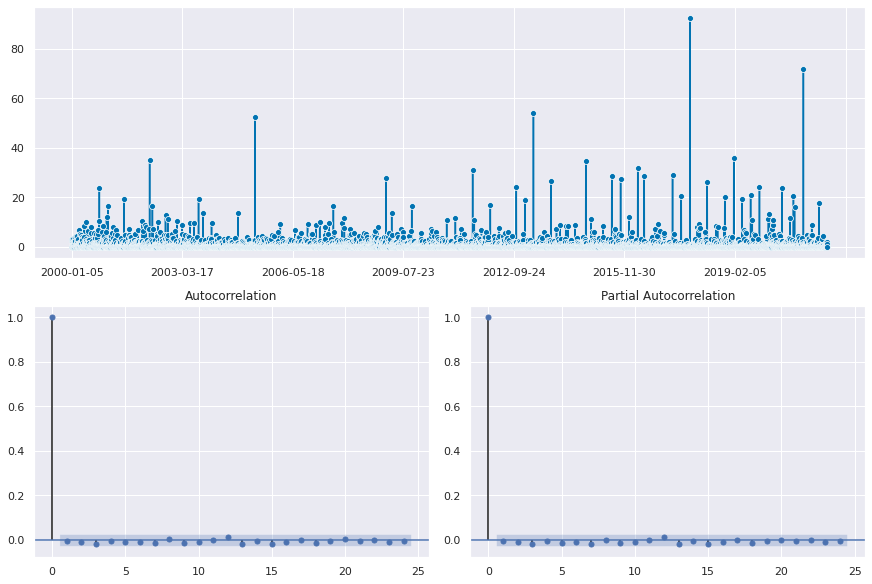

In [36]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid**2)

In [37]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid**2, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,6.849819,0.739543
20,12.634537,0.892508
30,14.568371,0.991960


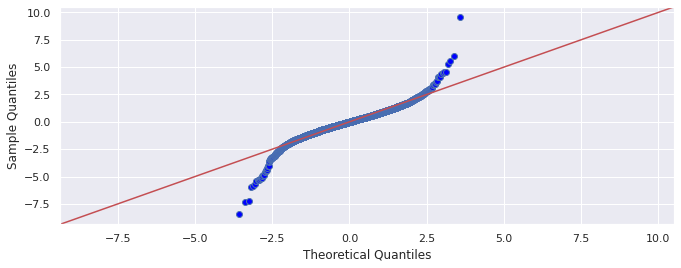

In [38]:
# qqplot
sm.qqplot(mod1_std_resid,line='45')
plt.show()

# <div class="hr1"></div>
 ## GARCH(1,1) + t-student
 <div class="hr1"></div>

In [39]:
#
from arch.univariate import StudentsT

In [40]:
#
ar.distribution = StudentsT()
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                      log_ret   R-squared:                       0.002
Mean Model:                              AR   Adj. R-squared:                  0.002
Vol Model:                            GARCH   Log-Likelihood:               -9271.27
Distribution:      Standardized Student's t   AIC:                           18554.5
Method:                  Maximum Likelihood   BIC:                           18594.2
                                              No. Observations:                 5470
Date:                      Sat, Oct 22 2022   Df Residuals:                     5468
Time:                              16:34:02   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

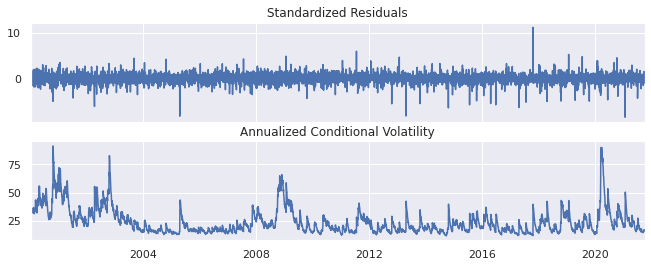

In [41]:
#
fig = res.plot(annualize="D")

In [42]:
# Análisis Residuos
mod1_std_resid=(res.resid / res.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407a0e71d0>,
       dtype=object))

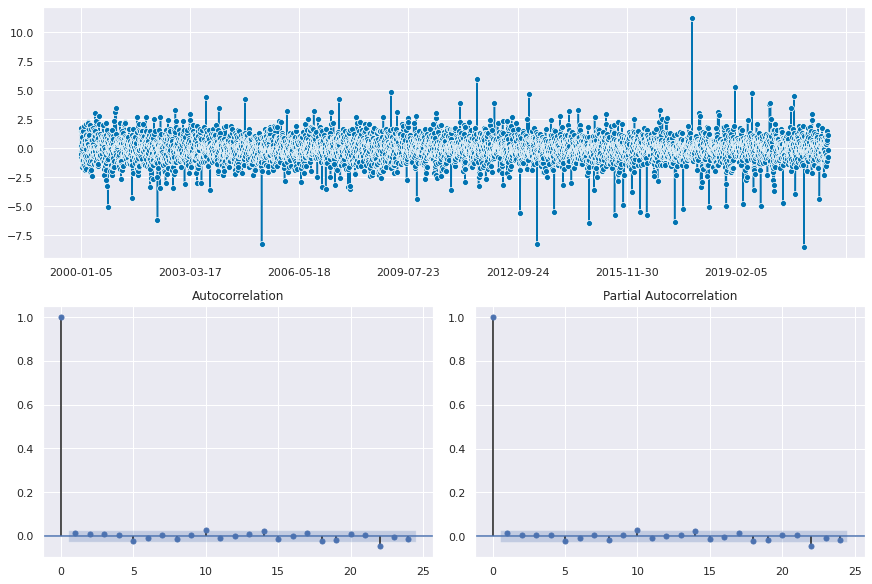

In [43]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid)

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f407a5e6a50>,
       dtype=object))

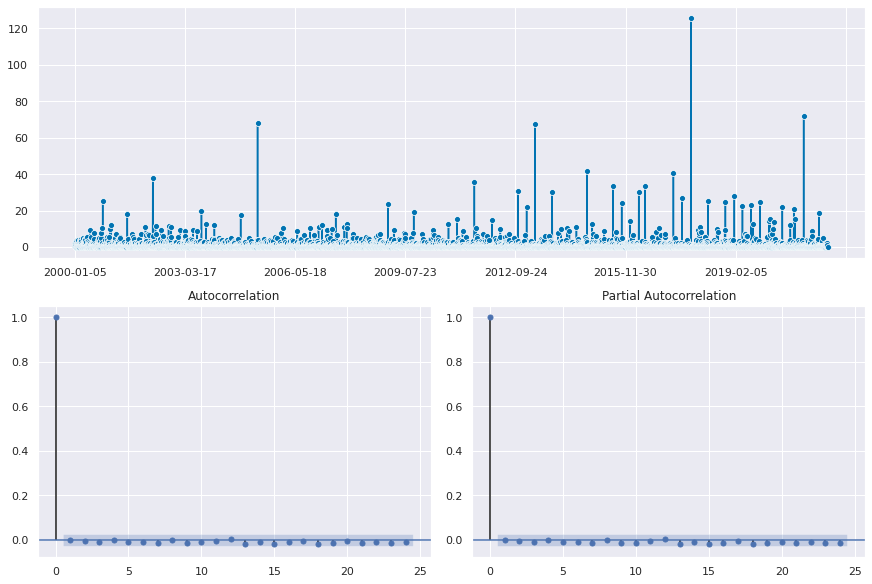

In [44]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid**2)

In [45]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid**2, lags=[10,20,30], return_df=True)

,lb_stat,lb_pvalue
10,4.127897,0.941393
20,12.151598,0.910759
30,17.639814,0.964079


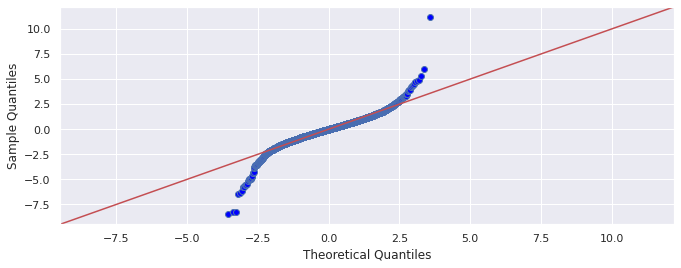

In [46]:
# qqplot normal
sm.qqplot(mod1_std_resid,line='45')
plt.show()

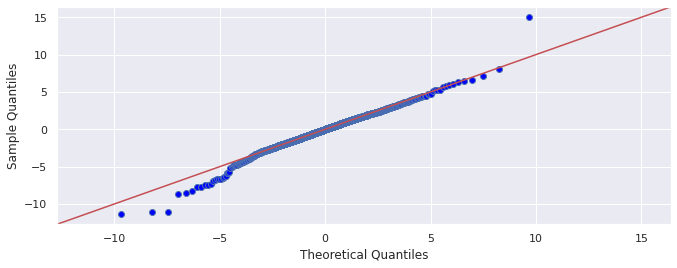

In [47]:
# qqplot t-student
sm.qqplot(mod1_std_resid,dist=stats.t,fit=True,line='45')
plt.show()

# <div class="hr1"></div>
 ## Forecast Volatility
 <div class="hr1"></div>

In [48]:
# Predicción 20 días
forecasts = res.forecast(horizon=20, reindex=False)

In [49]:
# Mean
forecasts.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
Date,,,,,,,,,,,,,,,,,,,,
2021-09-30,0.046322,0.039004,0.039241,0.039233,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234,0.039234


In [50]:
# Varianza
(forecasts.variance**0.5)*np.sqrt(252)

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
Date,,,,,,,,,,,,,,,,,,,,
2021-09-30,16.314873,16.491146,16.655739,16.817111,16.975378,17.130641,17.282998,17.432538,17.579348,17.723511,17.865104,18.004202,18.140876,18.275193,18.407218,18.537013,18.664638,18.790148,18.913598,19.035041
